In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
from IPython.core.interactiveshell import InteractiveShell
from sklearn.cluster import DBSCAN
import random
import seaborn as sns
import matplotlib.pyplot as plt

##Show the all data not skip middle data
InteractiveShell.ast_node_interactivity = "all"

# Load the data
Country= pd.read_csv('Country.csv', encoding='utf-8')
Indicators=pd.read_csv('Indicators.csv', encoding='utf-8')

In [27]:
# drop the unusing data
Country=Country.drop('ShortName',axis=1)
Country=Country.drop('TableName',axis=1)
Country=Country.drop('LongName',axis=1)
Country=Country.drop('Alpha2Code',axis=1)
Country=Country.drop('CurrencyUnit',axis=1)
Country=Country.drop('SpecialNotes',axis=1)
Country=Country.drop('Wb2Code',axis=1)
Country=Country.drop('NationalAccountsBaseYear',axis=1)
Country=Country.drop('NationalAccountsReferenceYear',axis=1)
Country=Country.drop('SnaPriceValuation',axis=1)
Country=Country.drop('LendingCategory',axis=1)
Country=Country.drop('OtherGroups',axis=1)
Country=Country.drop('SystemOfNationalAccounts',axis=1)
Country=Country.drop('AlternativeConversionFactor',axis=1)
Country=Country.drop('PppSurveyYear',axis=1)
Country=Country.drop('BalanceOfPaymentsManualInUse',axis=1)
Country=Country.drop('ExternalDebtReportingStatus',axis=1)
Country=Country.drop('SystemOfTrade',axis=1)
Country=Country.drop('GovernmentAccountingConcept',axis=1)
Country=Country.drop('ImfDataDisseminationStandard',axis=1)
Country=Country.drop('LatestPopulationCensus',axis=1)
Country=Country.drop('LatestHouseholdSurvey',axis=1)
Country=Country.drop('SourceOfMostRecentIncomeAndExpenditureData',axis=1)
Country=Country.drop('VitalRegistrationComplete',axis=1)
Country=Country.drop('LatestAgriculturalCensus',axis=1)
Country=Country.drop('LatestIndustrialData',axis=1)
Country=Country.drop('LatestTradeData',axis=1)
Country=Country.drop('LatestWaterWithdrawalData',axis=1)

In [28]:
##drop the nan value
Country=Country.dropna()

In [29]:
# Labeling the categorical data to traslate the number value
Country['Country_Encoder']=labelencoder.fit_transform(Country.iloc[:,0])
Country['Region_Encoder']=labelencoder.fit_transform(Country.iloc[:,1])

In [30]:
# Drop the unusing data in Indicator dataframe
Indicators=Indicators.drop('IndicatorName',axis=1)
Indicators=Indicators.drop('CountryName',axis=1)

In [31]:
# Shrink the number and see the more easy
Indicators['Year']=Indicators['Year']-1960

# Cut the data It's too many dat to calculate the code
Indicators=Indicators[Indicators['Year']>25]
Indicators=Indicators[Indicators['Year']<40]
# Reset the index to calculate the dataframe
Indicators=Indicators.reset_index(drop=True)

In [32]:
## pick the data then R1,R3,R4,R5,R6 each data 
Indicators_R1=Indicators[Indicators['IndicatorCode']=='TM.VAL.MRCH.R1.ZS']
Indicators_R3=Indicators[Indicators['IndicatorCode']=='TM.VAL.MRCH.R3.ZS']
Indicators_R4=Indicators[Indicators['IndicatorCode']=='TM.VAL.MRCH.R4.ZS']
Indicators_R5=Indicators[Indicators['IndicatorCode']=='TM.VAL.MRCH.R5.ZS']
Indicators_R6=Indicators[Indicators['IndicatorCode']=='TM.VAL.MRCH.R6.ZS']

In [33]:
# delete the nan data
Indicators_R1=Indicators_R1.dropna(how='all')
Indicators_R3=Indicators_R3.dropna(how='all')
Indicators_R4=Indicators_R4.dropna(how='all')
Indicators_R5=Indicators_R5.dropna(how='all')
Indicators_R6=Indicators_R6.dropna(how='all')

In [34]:
#Make the Indicator_set data frame and merge the all separated data.
Indicators_set=pd.concat([Indicators_R1,Indicators_R3,Indicators_R4,Indicators_R5,Indicators_R6],ignore_index=True)

#Reset the data index again
Indicators_set=Indicators.reset_index(drop=True)
Country=Country.reset_index(drop=True)

In [35]:
# Translate the Country Encoder to number value
Indicators_set['Country_Encoder']=labelencoder.fit_transform(Indicators_set.iloc[:,0])

In [36]:
count=0
# Cut the data It's too hard to calculate the all data.
Indicators_set=Indicators_set[Indicators_set['Country_Encoder']<200]

In [37]:
#Make the temp dataframe
Indicator_Sum=pd.DataFrame()

#Make the temp dataframe and Indicator_Sum will contain it
data_2=pd.DataFrame({"CountryCode":range(Indicators_set['Country_Encoder'].max()*Indicators_set['Year'].max())})
Indicator_Sum=Indicator_Sum.append(data_2)

data_3=pd.DataFrame({"Country_Encoder":range(Indicators_set['Country_Encoder'].max()*Indicators_set['Year'].max())})
Indicator_Sum=Indicator_Sum.append(data_3)

data_5=pd.DataFrame({"Income_Group":range(Indicators_set['Country_Encoder'].max()*Indicators_set['Year'].max())})
Indicator_Sum=Indicator_Sum.append(data_5)

data_4=pd.DataFrame({"Region_Encoder":range(Indicators_set['Country_Encoder'].max()*Indicators_set['Year'].max())})
Indicator_Sum=Indicator_Sum.append(data_4)

data_1=pd.DataFrame({"Sum":range(Indicators_set['Country_Encoder'].max()*Indicators_set['Year'].max())})
Indicator_Sum=Indicator_Sum.append(data_1)

data_6=pd.DataFrame({"Year":range(Indicators_set['Country_Encoder'].max()*Indicators_set['Year'].max())})
Indicator_Sum=Indicator_Sum.append(data_6)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [38]:
# Set the free value to fill the except the nan value
Indicator_Sum['Region_Encoder']=0
Indicator_Sum['Income_Group']='a'
Indicator_Sum['Year']=0

In [39]:
#Translate the CountryCode value to String value.
Indicator_Sum['CountryCode']=Indicator_Sum['CountryCode'].astype(str)
pd.set_option('display.max_colwidth',-1)

# Translate the data_2 free dataframe to String
data_2=data_2.astype(str)

In [40]:
##Select the data Using Indicators_set data frame and Indicators_set
##To merge two dataframe
for i in range(Indicators_set['Country_Encoder'].max()):
    for j in range(Indicators_set['Year'].max()):
        if(Indicators_set[(Indicators_set['Country_Encoder']==i)&(Indicators_set['Year']==j)].empty==False):
            temp=Indicators_set[(Indicators_set['Country_Encoder']==i)&(Indicators_set['Year']==j)&(Indicators_set['IndicatorCode']=='TM.VAL.MRCH.R3.ZS')]
            
            q_1=temp.iloc[0:1,0]
            q_2=temp.iloc[0:1,4]
            q_3=temp.iloc[0:1,2]
            
            temp_1=q_1.values.tolist()
            temp_2=q_2.values.tolist()
            temp_3=q_2.values.tolist()
            
            #print(temp)
            if not temp_1:
                continue
            elif not temp_2:
                continue
            else:
                Indicator_Sum.iloc[count,0]=temp_1[0]
                Indicator_Sum.iloc[count,1]=int(temp_2[0])
                Indicator_Sum.iloc[count,4]=sum(Indicators_set['Value'][(Indicators_set['Country_Encoder']==i)&(Indicators_set['Year']==j)])
                Indicator_Sum.iloc[count,5]=int(temp_3[0])
                count=count+1

In [41]:
#drop unusing data                
Indicator_Sum=Indicator_Sum.dropna(axis=0)
Indicator_Sum['Country_Encoder']=Indicator_Sum['Country_Encoder'].astype(int)

##Assing the Country data to merge the Indicator_Sum dataframe
for i in range(Indicator_Sum['Country_Encoder'].max()):
    for j in range(Country['Country_Encoder'].max()):
        if ((Indicator_Sum.iloc[i,0]) in (Country.iloc[j,0])):
            Indicator_Sum.iloc[i,2]=Country.iloc[j,2]
            Indicator_Sum.iloc[i,3]=Country.iloc[j,4]

In [42]:
# To seek the unusable dat set the nan value. and It will be droped.
for i in range(len(Indicator_Sum.iloc[:,1])):
    if Indicator_Sum.iloc[i,3]==0:
        # 초기화를 위한 Nan 값 설정
        Indicator_Sum.iloc[i,3]=np.nan

In [43]:
# Drop the Unusable data
Indicator_Sum.dropna(axis=0,inplace=True)
#Translate the categorical data to numbering
Indicator_Sum['Income_Group']=labelencoder.fit_transform(Indicator_Sum.iloc[:,2])
#Translate the float value to int value.
Indicator_Sum['Region_Encoder']=Indicator_Sum['Region_Encoder'].astype(int)
print(Indicator_Sum)

Indicator_Sum['Sum']=Indicator_Sum['Sum']/100000000000

    CountryCode  Country_Encoder  Income_Group  Region_Encoder           Sum  \
0    ABW         0                1             2               4.520895e+10   
1    ABW         0                1             2               4.856199e+10   
2    ABW         0                1             2               5.316954e+10   
3    ABW         0                1             2               5.530041e+10   
4    AGO         3                4             6               5.712363e+11   
5    AGO         3                4             6               5.997052e+11   
6    AGO         3                4             6               6.694008e+11   
7    AGO         3                4             6               6.703379e+11   
8    AGO         3                4             6               7.039589e+11   
9    AGO         3                4             6               6.229171e+11   
10   AGO         3                4             6               5.016728e+11   
11   AGO         3                4     

In [44]:
Indicator_Sum

,CountryCode,Country_Encoder,Income_Group,Region_Encoder,Sum,Year
0,ABW,0,1,2,0.452089,0
1,ABW,0,1,2,0.485620,0
2,ABW,0,1,2,0.531695,0
3,ABW,0,1,2,0.553004,0
4,AGO,3,4,6,5.712363,3
5,AGO,3,4,6,5.997052,3
6,AGO,3,4,6,6.694008,3
7,AGO,3,4,6,6.703379,3
8,AGO,3,4,6,7.039589,3
9,AGO,3,4,6,6.229171,3


{'whiskers': [<matplotlib.lines.Line2D at 0x27f541e4128>,
 'caps': [<matplotlib.lines.Line2D at 0x27f541e4f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f541e40b8>],
 'medians': [<matplotlib.lines.Line2D at 0x27f54281128>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f54281a20>],
 'means': []}

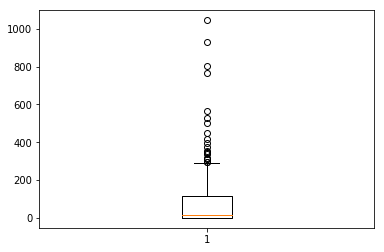

{'whiskers': [<matplotlib.lines.Line2D at 0x27f60252550>,
 'caps': [<matplotlib.lines.Line2D at 0x27f60252e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f60221c88>],
 'medians': [<matplotlib.lines.Line2D at 0x27f602550f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f60255518>],
 'means': []}

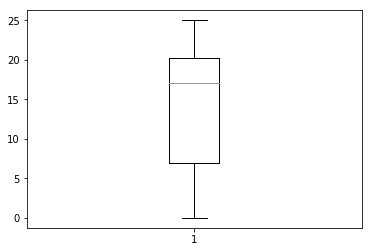

In [45]:
# Draw the data statement
Data=Indicator_Sum.iloc[:,1:6]
plt.boxplot(Indicator_Sum['Sum'])
plt.show()
plt.boxplot(Indicator_Sum['Country_Encoder'])
plt.show()

In [46]:
#make the DB Scan model
model=DBSCAN(eps=7, min_samples=3)
model.fit(Data)
y_predict=model.fit_predict(Data)
# Save the predict value in 'cluster' 
Data['Cluster']=y_predict
print('DB SCAN')
print(Data)
# to show the result. make the color one color one cluster will save it
color_=([],[])


color_make=max(Data.iloc[:,5])-1*min(Data.iloc[:,5])
color_=[[0]*3 for k in range(int(color_make))]

for i in range(int(color_make)):
    color_[i][0]=random.random()##r
    color_[i][1]=random.random()##g
    color_[i][2]=random.random()##b

DBSCAN(algorithm='auto', eps=7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

DB SCAN
     Country_Encoder  Income_Group  Region_Encoder          Sum  Year  Cluster
0    0                1             2               0.452089     0     0      
1    0                1             2               0.485620     0     0      
2    0                1             2               0.531695     0     0      
3    0                1             2               0.553004     0     0      
4    3                4             6               5.712363     3     1      
5    3                4             6               5.997052     3     1      
6    3                4             6               6.694008     3     1      
7    3                4             6               6.703379     3     1      
8    3                4             6               7.039589     3     1      
9    3                4             6               6.229171     3     1      
10   3                4             6               5.016728     3     1      
11   3                4             6       

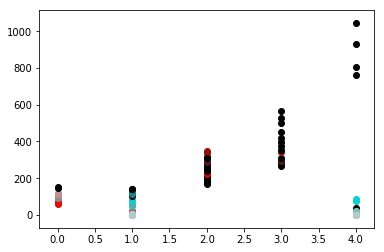

In [51]:
## scatter plot the each points and check the clustering result    
for j in range(len(Data)):
    if Data.iloc[j,5]==-1:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='black')
    else:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color=(color_[int(Data.iloc[j,5])][0],color_[int(Data.iloc[j,5])][1],color_[int(Data.iloc[j,5])][1]))

In [52]:
# Gaussian Mixture cluster.
from sklearn.mixture import GaussianMixture
# Make the GaussianMixture cluster
model=GaussianMixture(n_components=2, init params='random',random_state=0,tol=1e-9,max_iter=10)
model.fit(X)
#Save the cluster result
pi=model.predict_proba(X)
plt.scatter(X[:,0],X[:,1],s=50,, linewidth=1, edgecolors="b")


print('EM Clustering')
from sklearn.mixture import GMM
gmm=GMM(n_components=4).fit(Indicator_Sum.iloc[:,1:6])
labels=gmm.predict(Indicator_Sum.iloc[:,1:6])
print(labels)
probs=gmm.predict_proba(X)
print(probs)


SyntaxError: invalid syntax (<ipython-input-52-30fcefd95cc9>, line 4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


cluster result
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
      ... 
168    0.0
169    0.0
170    0.0
171    0.0
172   NaN 
173   NaN 
174   NaN 
175   NaN 
176   NaN 
177   NaN 
178   NaN 
179   NaN 
180   NaN 
181   NaN 
182   NaN 
183   NaN 
184   NaN 
185   NaN 
186   NaN 
187   NaN 
188   NaN 
189   NaN 
190   NaN 
191   NaN 
192   NaN 
193   NaN 
194   NaN 
195   NaN 
196   NaN 
197   NaN 
Name: cluster, Length: 172, dtype: float64



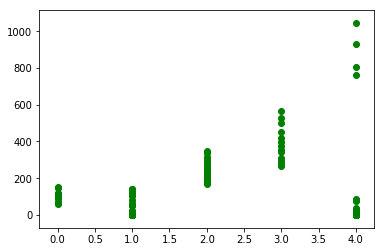

In [49]:
## Import the Kmeans model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Make KMeans model set the cluster 3
model=KMeans(n_clusters=3,algorithm='auto')
model.fit(Data)
Data['cluster']=pd.DataFrame(model.predict(Data))

print('')

print('cluster result')
print(Data['cluster'])
print('')
## scatter plot the each points and check the clustering result    
for j in range(len(Data)):
    if Data.iloc[j,5]==0:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='black')
    elif Data.iloc[j,5]==1:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='red')
    else:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='green')

In [50]:
#Set the GaussianMixture model.
from sklearn.mixture import GaussianMixture

model=GaussianMixture(n_components=2, 
                      init_params='random',random_state=0)
model.fit(Data)
Data['cluster']=pd.DataFrame(model.predict(Data))

print(Data['cluster'])

for j in range(len(Data)):
    if Data.iloc[j,5]==0:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='black')
    elif Data.iloc[j,5]==1:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='red')
    else:
        plt.scatter(Data.iloc[j,1],Data.iloc[j,3],color='green')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').